# 1. 完全重复数据（Exact Duplicates）

In [1]:
import pandas as pd

# 创建数据集（完全重复行）
df = pd.DataFrame({
    "ID": [101, 102, 103, 103, 104, 106],
    "Name": ["Alice", "Bob", "Charlie", "Charlie", "David", "David"],
    "Age": [25, 30, 35, 35, 40, 40],
    "Income": [5000, 7000, 8000, 8000, 6500, 6500]
})

print("原始数据：\n", df)

# 检测完全重复行
duplicates = df[df.duplicated(keep=False)]
print("\n检测到的完全重复行：\n", duplicates)

# 删除完全重复行（保留第一行）
df_no_duplicates = df.drop_duplicates(keep='first')
print("\n删除完全重复行后的数据：\n", df_no_duplicates)


原始数据：
     ID     Name  Age  Income
0  101    Alice   25    5000
1  102      Bob   30    7000
2  103  Charlie   35    8000
3  103  Charlie   35    8000
4  104    David   40    6500
5  106    David   40    6500

检测到的完全重复行：
     ID     Name  Age  Income
2  103  Charlie   35    8000
3  103  Charlie   35    8000

删除完全重复行后的数据：
     ID     Name  Age  Income
0  101    Alice   25    5000
1  102      Bob   30    7000
2  103  Charlie   35    8000
4  104    David   40    6500
5  106    David   40    6500


# 2. 部分列重复数据（Partial Duplicates）

In [9]:
# 创建数据集（部分列重复）
df = pd.DataFrame({
    "ID": [101, 102, 103, 103, 104, 104],
    "Name": ["Alice", "Bob", "Charlie", "Charlie", "David", "David"],
    "Age": [25, 30, 35, 35, 40, 42],  # 年龄不同
    "Income": [5000, 7000, 8000, 8200, 6500, 6700]  # 收入不同
})

print("原始数据：\n", df)

# 根据 ID 去重（保留第一次出现的行）
df_unique_id = df.drop_duplicates(subset=["ID"], keep='first')
print("\n根据 ID 去重后的数据：\n", df_unique_id)

# 根据 ID 聚合收入（取均值）
df_aggregated = df.groupby("ID", as_index=False).agg({
    "Age": "mean",  # 平均年龄
    "Income": "mean"  # 平均收入
})
print("\n根据 ID 聚合后的数据：\n", df_aggregated)


原始数据：
     ID     Name  Age  Income
0  101    Alice   25    5000
1  102      Bob   30    7000
2  103  Charlie   35    8000
3  103  Charlie   35    8200
4  104    David   40    6500
5  104    David   42    6700

根据 ID 去重后的数据：
     ID     Name  Age  Income
0  101    Alice   25    5000
1  102      Bob   30    7000
2  103  Charlie   35    8000
4  104    David   40    6500

根据 ID 聚合后的数据：
     ID   Age  Income
0  101  25.0  5000.0
1  102  30.0  7000.0
2  103  35.0  8100.0
3  104  41.0  6600.0


# 3. 数据录入误差（Near Duplicates）

In [10]:
# 创建数据集（录入误差）
df = pd.DataFrame({
    "ID": [101, 102, 103, 104, 105],
    "Name": [" Alice", "bob", "Charlie", "DAVID", "Eva"],
    "Income": [5000, 7000, 8000, 6500, 7200]
})

print("原始数据：\n", df)

# 数据清洗：去除多余空格，统一大小写
df["Name"] = df["Name"].str.strip().str.capitalize()
print("\n清洗后的数据：\n", df)


原始数据：
     ID     Name  Income
0  101    Alice    5000
1  102      bob    7000
2  103  Charlie    8000
3  104    DAVID    6500
4  105      Eva    7200

清洗后的数据：
     ID     Name  Income
0  101    Alice    5000
1  102      Bob    7000
2  103  Charlie    8000
3  104    David    6500
4  105      Eva    7200


# 异常值检测

In [4]:
import numpy as np 
import pandas as pd 
# 生成示例数据 
np.random.seed(42)
data = pd.DataFrame({"Salary": np.random.normal(5000, 1000, 100)}) 
# 均值 5000，标准差 1000 
# 计算均值和标准差 
mean = data["Salary"].mean() 
std = data["Salary"].std() 
# 设定异常值范围（均值 ± 3 * 标准差）
lower_bound = mean - 3 * std 
upper_bound = mean + 3 * std
 # 找出异常值 
outliers = data[(data["Salary"] < lower_bound) | (data["Salary"] > upper_bound)]
print(outliers) 


Empty DataFrame
Columns: [Salary]
Index: []


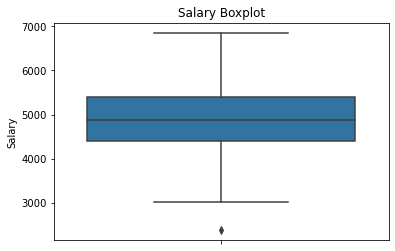

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(y=data["Salary"])
plt.title("Salary Boxplot")
plt.show()


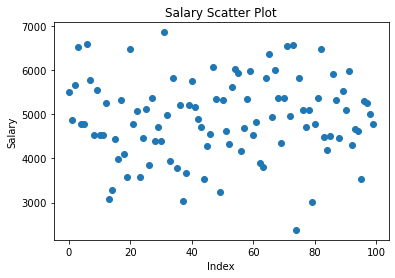

In [9]:
plt.scatter(range(len(data)), data["Salary"])
plt.xlabel("Index")
plt.ylabel("Salary")
plt.title("Salary Scatter Plot")
plt.show()

# 长尾分布

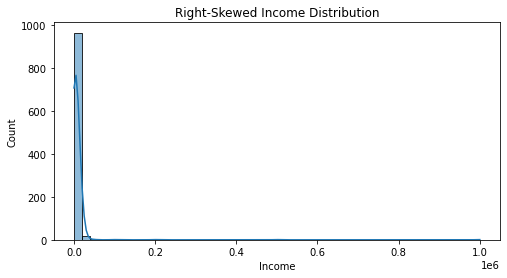

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 生成右偏分布数据（长尾分布）
np.random.seed(42)
income = np.append(np.random.exponential(scale=5000, size=980), [50000, 100000, 200000, 500000, 1000000])
# 绘制直方图
plt.figure(figsize=(8, 4))
sns.histplot(income, bins=50, kde=True)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Right-Skewed Income Distribution")
plt.show()

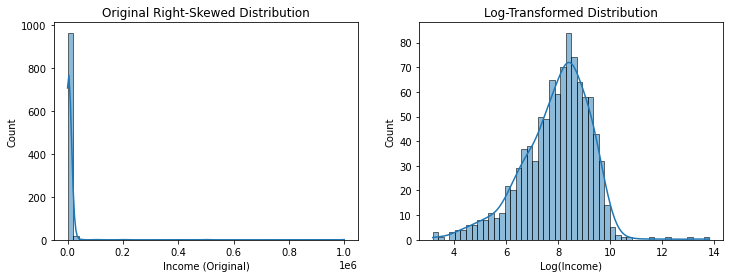

In [11]:
# 对数变换
log_income = np.log1p(income)  # 使用 log(1 + X) 避免 log(0)
# 绘制对比图
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(income, bins=50, kde=True)
plt.xlabel("Income (Original)")
plt.title("Original Right-Skewed Distribution")
plt.subplot(1, 2, 2)
sns.histplot(log_income, bins=50, kde=True)
plt.xlabel("Log(Income)")
plt.title("Log-Transformed Distribution")
plt.show()
